# Capstone Project

### Data Import

###### Import necessary libraries

In [1]:
import pandas as pd
import zipfile
import os
import warnings
import pandas_profiling
ignorewarnings=True
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
import re
import nltk
from nltk.corpus import stopwords
import unidecode
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

###### Unzipping the Zip folder containing dataset
- Using ZipFile from module named zipfile extract all the input files

In [2]:
with zipfile.ZipFile("Capstone Dataset.zip","r") as zip_ref:
    zip_ref.extractall("Dataset")

In [3]:
def read_data():
    global df1,df2,df3
    path=os.getcwd()
    print('Current working directory is: \n',path)
    print('\n*****Changing the path to extracted folder*****')
    os.chdir(path+'\\Dataset')
    new_path=os.getcwd()
    print('\nNew working directory with input files: \n',new_path)
    dataset=os.listdir(new_path)
    
    df1=pd.read_csv(new_path+'\\'+str(dataset[0]),low_memory=False)
    df2=pd.read_csv(new_path+'\\'+str(dataset[1]),low_memory=False)
    df3=pd.read_csv(new_path+'\\'+str(dataset[2]),low_memory=False)
    dataset=os.listdir(new_path)
    print('\nFiles present in the extracted folder are-', dataset)
    

In [4]:
read_data()

Current working directory is: 
 C:\Users\shrsriv\Desktop\RA Academy\Capstone Project

*****Changing the path to extracted folder*****

New working directory with input files: 
 C:\Users\shrsriv\Desktop\RA Academy\Capstone Project\Dataset

Files present in the extracted folder are- ['1429_1.csv', 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', 'ratings_count_bar_chart.svg']


- Reading all the three files and storing the data into pandas Dataframe

In [5]:
def data_summary(list_df):
    count=1
    for i in list_df:
        print('\n Shape of df'+str(count),i.shape)
        print('\n Let us see sample data of df '+str(count))
        display(i.sample(3))
        print('\n Let us check the basic info of df '+str(count))
        display(i.info())
        print('\n Let us check the basic info of df '+str(count))
        display(i.describe(include='all').T)
        print('\n Let us check the percentage of null value count in df '+str(count))
        print((i.isnull().sum()*100/len(i)).sort_values(ascending=False))
        count+=1
        print('*'*85)

In [6]:
## df_list : list of all df
df_list=[df1,df2,df3]
data_summary(df_list)


 Shape of df1 (34660, 21)

 Let us see sample data of df 1


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
23604,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-20T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5588528/review...,Fun and easy to use. My son loves for Alexa to...,Fun,NaN,NaN,Tony
2550,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-06T00:00:00.000Z,2017-05-21T06:04:05Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:03:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Great buy for my 7yr old cheap so if it ends u...,Great for kids,NaN,NaN,2roudyboys
27613,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-06-10T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,"This thing is awesome. Funny, easy to use and ...",New freind Echo,NaN,NaN,Sobsch



 Let us check the basic info of df 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-

None


 Let us check the basic info of df 1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,34660,42,AVphgVaX1cnluZ0-DR74,10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,27900,48,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,34658,41,B018Y229OU,10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,34660,6,Amazon,28701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,34660,41,"Fire Tablets,Tablets,Computers & Tablets,All T...",10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keys,34660,42,firetablet7displaywifi8gbincludesspecialoffers...,10966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,34660,2,Amazon,34639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.date,34621,1078,2017-01-16T00:00:00.000Z,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.dateAdded,24039,1941,2017-09-05T22:09:30Z,3127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.dateSeen,34660,3911,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",5072,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Let us check the percentage of null value count in df 1
reviews.userProvince    100.000000
reviews.userCity        100.000000
reviews.didPurchase      99.997115
reviews.id               99.997115
reviews.dateAdded        30.643393
name                     19.503751
reviews.doRecommend       1.713791
reviews.numHelpful        1.526255
reviews.date              0.112522
reviews.rating            0.095211
reviews.title             0.014426
reviews.username          0.005770
asins                     0.005770
reviews.text              0.002885
reviews.dateSeen          0.000000
manufacturer              0.000000
keys                      0.000000
reviews.sourceURLs        0.000000
categories                0.000000
brand                     0.000000
id                        0.000000
dtype: float64
*************************************************************************************

 Shape of df2 (5000, 24)

 Let us see sample data of df 2


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
1499,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,...,2018-04-26T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/6036024/revie...,WORTH IT I LOVED WELL INVESTED MONEY. ALEXA HE...,WORTH IT VERY USEFUL,ckl221,https://www.newegg.com/Product/Product.aspx%25...
4251,AVpjEN4jLJeJML43rpUe,2016-06-08T03:50:06Z,2017-10-21T21:11:53Z,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,https://i.ebayimg.com/thumbs/images/g/crIAAOSw...,"841667103143,0841667103143,brandnewamazonkindl...",...,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025500/review...,Just love this tablet.does everything teenage ...,Great tablet for my grandson,Susie,http://www.ebay.com/itm/BRAND-NEW-Amazon-Kindl...
1757,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2018-09-21T18:45:21Z,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",B018Y22BI4,Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,http://i.ebayimg.com/thumbs/images/g/3MIAAOSwo...,amazonfire16gb5thgen2015releaseblack/272201222...,...,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,NaN,0,4,http://reviews.bestbuy.com/3545/5023200/review...,Has what is necessary for the average individu...,Good tablet,POE714,http://reviews.bestbuy.com/3545/5023200/review...



 Let us check the basic info of df 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  

None


 Let us check the basic info of df 2


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5000,24,AVqkIhwDv8e3D1O-lebb,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateAdded,5000,20,2017-03-06T14:59:43Z,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateUpdated,5000,17,2018-09-21T18:45:21Z,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,5000,23,Amazon Echo Show Alexa-enabled Bluetooth Speak...,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,5000,24,B01AHB9CN2,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,5000,1,Amazon,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,5000,23,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryCategories,5000,4,Electronics,3276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imageURLs,5000,24,https://i5.walmartimages.com/asr/c494506a-b347...,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keys,5000,24,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",797,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Let us check the percentage of null value count in df 2
reviews.id             99.42
reviews.dateAdded      78.96
reviews.title           0.26
id                      0.00
dateAdded               0.00
reviews.username        0.00
reviews.text            0.00
reviews.sourceURLs      0.00
reviews.rating          0.00
reviews.numHelpful      0.00
reviews.doRecommend     0.00
reviews.dateSeen        0.00
reviews.date            0.00
manufacturerNumber      0.00
manufacturer            0.00
keys                    0.00
imageURLs               0.00
primaryCategories       0.00
categories              0.00
brand                   0.00
asins                   0.00
name                    0.00
dateUpdated             0.00
sourceURLs              0.00
dtype: float64
*************************************************************************************

 Shape of df3 (28332, 24)

 Let us see sample data of df 3


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
3578,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Very good!,Five Stars,ByInna,"https://www.barcodable.com/upc/841710106442,ht..."
26596,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"Purchase for a 12 year old. Sturdy, easy to us...",Good value,Lisa,http://reviews.bestbuy.com/3545/5620410/review...
26342,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I bought as a Christmas gift for my 9 year old...,Fire HD,Kimmie,http://reviews.bestbuy.com/3545/5620410/review...



 Let us check the basic info of df 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15

None


 Let us check the basic info of df 3


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,28332,65,AVpgNzjwLJeJML43Kpxn,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateAdded,28332,55,2015-10-30T08:59:32Z,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateUpdated,28332,52,2019-04-25T09:08:16Z,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,28332,65,AmazonBasics AAA Performance Alkaline Batterie...,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,28332,65,"B00QWO9P0O,B00LH3DMUO",8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,28332,3,Amazon,16153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,28332,60,"AA,AAA,Health,Electronics,Health & Household,C...",8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryCategories,28332,9,Electronics,13995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imageURLs,28332,65,https://images-na.ssl-images-amazon.com/images...,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keys,28332,65,"amazonbasics/hl002619,amazonbasicsaaaperforman...",8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Let us check the percentage of null value count in df 3
reviews.didPurchase    99.968234
reviews.id             99.855287
reviews.doRecommend    43.223211
reviews.numHelpful     43.120853
id                      0.000000
dateAdded               0.000000
reviews.username        0.000000
reviews.title           0.000000
reviews.text            0.000000
reviews.sourceURLs      0.000000
reviews.rating          0.000000
reviews.dateSeen        0.000000
reviews.date            0.000000
manufacturerNumber      0.000000
manufacturer            0.000000
keys                    0.000000
imageURLs               0.000000
primaryCategories       0.000000
categories              0.000000
brand                   0.000000
asins                   0.000000
name                    0.000000
dateUpdated             0.000000
sourceURLs              0.000000
dtype: float64
*************************************************************************************


## Insights

Shape of Dataframes are:
- df1 has 34660 observations and 21 columns
- df2 has 5000 observations and 24 columns
- df1 has 28332 observations and 24 columns

#### DataFrame 1

- There are total 34660 observations out of which count of unique values for almost all the columns is very less
- Column name: 'reviews.text' has all the distinct values , no duplicates
- Df1 has some null/missing values present in the observations
- Majority of columns(total 16 columns) have data type as 'object'
- Columns (total 5 columns) like id, province, etc has 'float' as datatype
- Date is also mentioned in 'object' datatype

#### DataFrame 2

- There are total 5000 observations out of which count of unique values for almost all the columns is very less
- Column name: 'reviews.text' and 'reviews.username' have the highest count of distinct values 
- Df2 has some null/missing values present in the observations
- Majority of columns(total 20 columns) have data type as 'object'
- Columns (total 4 columns) like id, rating, dorecommend,etc has 'float' , 'int' and/or 'bool' as datatype
- Date added/seen columns also mentioned in 'object' datatype and needs to be formatted before usage(if any)

#### DataFrame 3

- There are total 28332 observations out of which count of unique values for almost all the columns is very less
- Column name: 'reviews.text' and 'reviews.username' have the highest count of distinct values 
- Df3 has some null/missing values present in the observations
- Majority of columns(total 21 columns) have data type as 'object'
- Columns (total 3 columns) like id, rating, numhelpful has 'float' , 'int' as datatype
- Date purchase/seen columns also mentioned in 'object' datatype and needs to be formatted before usage(if any)

#### Dealing with Null Values 

- In all the 3 dataframes, there are few columns where the null value % is huge.
- Since these columns do not contribute to the data relevancy, we will proceed ahead and drop all the columns wherever the null value percent is >75%

In [7]:
## to create better visuals
mpl.rcParams['figure.figsize']=[7,5]
mpl.rcParams['figure.dpi']=70
sns.set_theme(style='darkgrid')

Visualization for null values for Df1


<AxesSubplot:>

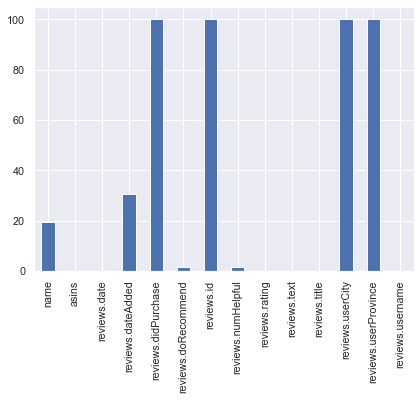

In [9]:
print('Visualization for null values for Df1')
(df1.isna().sum()/len(df1)*100)[df1.isna().sum()>0].plot(kind='bar')

Visualization for null values for Df2


<AxesSubplot:>

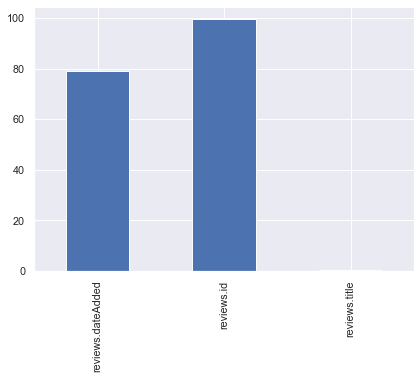

In [10]:
print('Visualization for null values for Df2')
(df2.isna().sum()/len(df2)*100)[df2.isna().sum()>0].plot(kind='bar')

Visualization for null values for Df3


<AxesSubplot:>

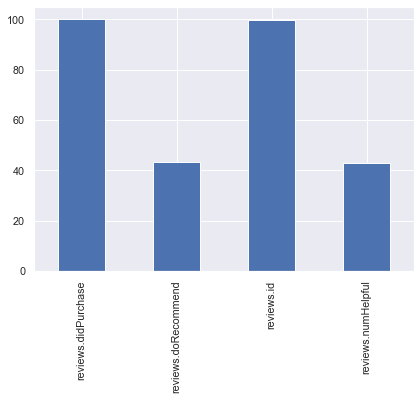

In [11]:
print('Visualization for null values for Df3')
(df3.isna().sum()/len(df3)*100)[df3.isna().sum()>0].plot(kind='bar')

- We can see that majority of columns in all the 3 dataframes are having null values.
- We will drop the columns that have a threshold of 75% or more null values.

In [12]:
###### FUNCTION TO DROP COLUMNS WITH NULL VALUES HIGHER THAT 75%
def drop_columns(df):
    perc = 75.0
    min_count =  int(((100-perc)/100)*df.shape[0] + 1)
    df.dropna( axis=1, 
        thresh=min_count,inplace=True)
    #print('Columns having null values greater than 75% threshold')
    #print((df.isnull().sum()*100/len(df)).any()>75.0)

In [13]:
for i in df_list:
    drop_columns(i)

#### Creating a new column named Sentiment and mapping the ratings as positive and negative
- Let's consider positive review as ratings >3 
- Negative rating as rating <=3
- Let's check the ratio of positive and negative reviews from 3 datasets.
- We will consider the df3 dataset as whole and let's check the distribution of positive and negative reviews for other dfs

In [14]:
def map_ratings(x):
  if x<=3:
    return 'negative'
  else:
    return 'positive'

In [15]:
for i in df_list:
    i['Sentiment'] = i['reviews.rating'].map(map_ratings)

Countplot for Sentiments in DF1


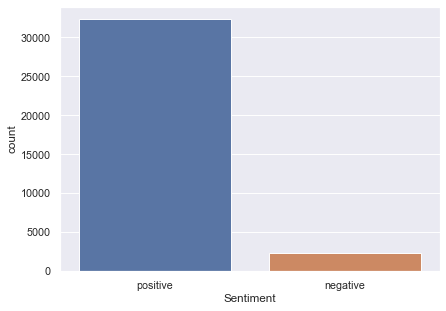

In [16]:
sns.countplot(x=df1['Sentiment'])
print('Countplot for Sentiments in DF1')

Countplot for Sentiments in DF2


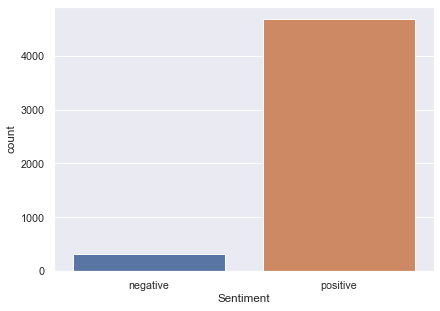

In [19]:
sns.countplot(x=df2['Sentiment'])
print('Countplot for Sentiments in DF2')

Countplot for Sentiments in DF3


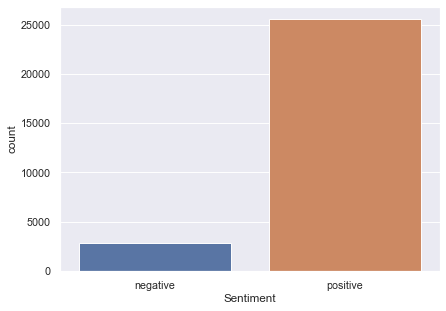

In [20]:
sns.countplot(x=df3['Sentiment'])
print('Countplot for Sentiments in DF3')

In [21]:
def rating_ratio(list_1):
    count=1
    neg_total=0
    pos_total=0
    for i in list_1:
        
        print('Count of -ve ratings in df'+str(count),len(i[i['reviews.rating']<=3]))
        neg_total+=len(i[i['reviews.rating']<=3])
        print('Count of +ve ratings in df'+str(count),len(i[i['reviews.rating']>3]))
        pos_total+=len(i[i['reviews.rating']>3])
        print('\n')
        count+=1
    print('Total -ve reviews: ', neg_total)
    print('Total +ve reviews: ',pos_total)
    print('Ratio of +ve to -ve', neg_total/pos_total)
    print('Percentage of +ve reviews: ',(pos_total/(neg_total+pos_total))*100)
    print('Percentage of -ve reviews: ',(neg_total/(neg_total+pos_total))*100)
    temp_list=[neg_total,pos_total]
    

In [22]:
rating_ratio(df_list)

Count of -ve ratings in df1 2311
Count of +ve ratings in df1 32316


Count of -ve ratings in df2 314
Count of +ve ratings in df2 4686


Count of -ve ratings in df3 2787
Count of +ve ratings in df3 25545


Total -ve reviews:  5412
Total +ve reviews:  62547
Ratio of +ve to -ve 0.08652693174732601
Percentage of +ve reviews:  92.03637487308525
Percentage of -ve reviews:  7.963625126914757


##### Visualizing the count for each rating

Visualizing count for each rating in DF1


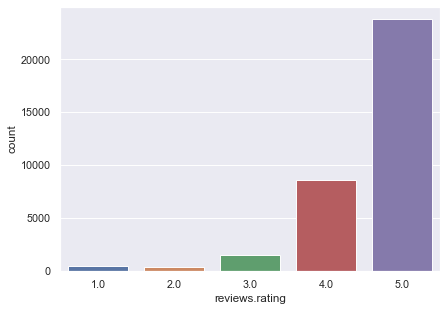

In [24]:
##df1
sns.countplot(x=df1['reviews.rating'])
print('Visualizing count for each rating in DF1')

Visualizing count for each rating in DF2


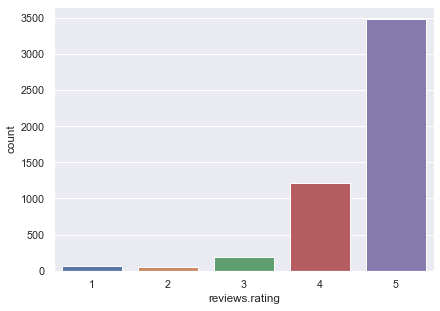

In [25]:
##df2
sns.countplot(x=df2['reviews.rating'])
print('Visualizing count for each rating in DF2')

Visualizing count for each rating in DF3


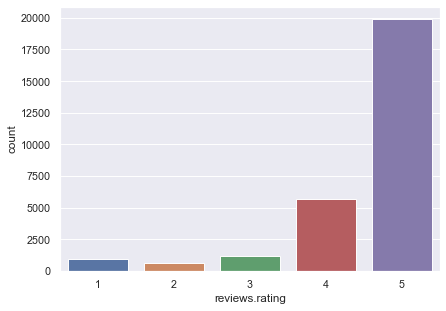

In [26]:
##df3
sns.countplot(x=df3['reviews.rating'])
print('Visualizing count for each rating in DF3')

#### Since the count of negative reviews are very less
- Hence Let's consider only -ve reviews from df1 and df2 and consider the whole data from df3

- Creating new df considering only the -ve reviews from Dataframe 1 and Dataframe 2: namely df_new1,df_new2

In [27]:
df_new1=df1[df1['reviews.rating']<=3]
df_new2=df2[df2['reviews.rating']<=3]

In [28]:
## df_list1 : list of new dfs
df_list1=[df_new1,df_new2,df3]
rating_ratio(df_list1)

Count of -ve ratings in df1 2311
Count of +ve ratings in df1 0


Count of -ve ratings in df2 314
Count of +ve ratings in df2 0


Count of -ve ratings in df3 2787
Count of +ve ratings in df3 25545


Total -ve reviews:  5412
Total +ve reviews:  25545
Ratio of +ve to -ve 0.21186142102172636
Percentage of +ve reviews:  82.5176858222696
Percentage of -ve reviews:  17.4823141777304


##### Let's concatenate all the DFs and and see the biasness in the positive and negative rating considering rating <=3 as -ve and >3 as +ve

In [29]:
## data_temp : df with original dataframes concatenated
data_temp=pd.concat([df1,df2,df3])
## data : df with modified dataframes concatenated
data=pd.concat([df_new1,df_new2,df3])

In [26]:
data_recommend=data.copy(deep=True)

Countplot of positive and negative Sentiments


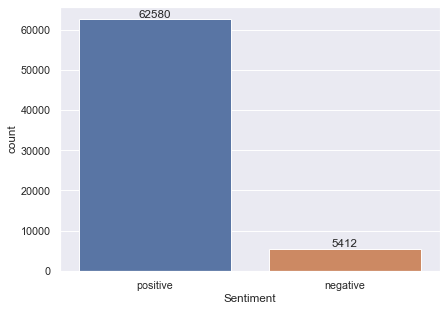

In [31]:
data_temp['Sentiment'] = data_temp['reviews.rating'].map(map_ratings)
ax = sns.countplot(x=data_temp['Sentiment'], data=data_temp)
ax.bar_label(ax.containers[0])
print('Countplot of positive and negative Sentiments')

Countplot of positive and negative Sentiments


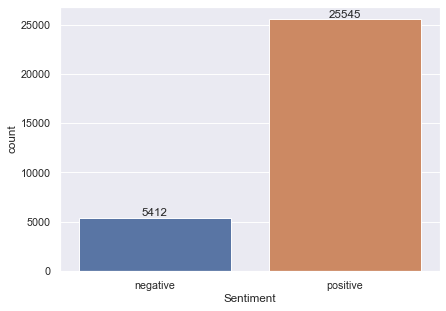

In [32]:
data['Sentiment'] = data['reviews.rating'].map(map_ratings)
ax = sns.countplot(x=data['Sentiment'], data=data)
ax.bar_label(ax.containers[0])
print('Countplot of positive and negative Sentiments')

- We can see from above graphs as well that there is a huge difference in the count of positive and negative sentiments.
- But the % of biasness reduces from 92 % to 82%.
- hence we will proceed with the modified df that consifers -ve feedbacks only from 2 DFs and all the observations from 3rd DF

#### Let us see the basic info of new dataframe named 'data'

In [33]:
### Calling the function data_summary to gather basic insights
data.reset_index(inplace=True,drop=True)
data_summary([data])


 Shape of df1 (30957, 24)

 Let us see sample data of df 1


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.text,reviews.title,reviews.username,Sentiment,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
26481,AVph0EeEilAPnD_x9myq,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y22C2Y,Amazon,"Computers,Fire Tablets,Electronics Features,Co...",amazonfirekidsedition16gb5thgen2015releaseblue...,Amazon,2017-01-19T00:00:00.000Z,NaN,"2017-04-26T00:00:00Z,2017-06-04T00:00:00Z,2017...",...,We love this tablet for our 2 year old. She ca...,Kindle Fire for kids,Ktspony,positive,2017-01-11T06:58:33Z,2019-02-25T02:05:06Z,Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,53-004755,http://reviews.bestbuy.com/3545/5026000/review...
23399,AVwjfXqqQMlgsOJE8qmm,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,Amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,2017-10-12T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,...,"I am highly recommending this product, top not...",PERFECT!,Marvs13,positive,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,Electronics,https://www.barcodable.com/images/barcode/0841...,53-005705,https://reviews.bestbuy.com/3545/5836204/revie...
12254,AVpe7xlELJeJML43ypLz,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",amazonbasicsaaperformancealkalinebatteries48co...,AmazonBasics,2017-06-16T00:00:00.000Z,NaN,2017-06-28T00:00:00Z,...,I think these are the same a duracell batteries.,Five Stars,ByPaulie Wallie,positive,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,Health & Beauty,https://images-na.ssl-images-amazon.com/images...,LR6G0748FFPAB-US,"https://www.barcodable.com/upc/841710106411,ht..."



 Let us check the basic info of df 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30957 entries, 0 to 30956
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   30957 non-null  object 
 1   name                 30600 non-null  object 
 2   asins                30957 non-null  object 
 3   brand                30957 non-null  object 
 4   categories           30957 non-null  object 
 5   keys                 30957 non-null  object 
 6   manufacturer         30957 non-null  object 
 7   reviews.date         30957 non-null  object 
 8   reviews.dateAdded    1630 non-null   object 
 9   reviews.dateSeen     30957 non-null  object 
 10  reviews.doRecommend  18608 non-null  object 
 11  reviews.numHelpful   18667 non-null  float64
 12  reviews.rating       30957 non-null  float64
 13  reviews.sourceURLs   30957 non-null  object 
 14  reviews.text         30957 non-null  object 
 15

None


 Let us check the basic info of df 1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30957,82,AVpgNzjwLJeJML43Kpxn,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,30600,98,AmazonBasics AAA Performance Alkaline Batterie...,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,30957,85,"B00QWO9P0O,B00LH3DMUO",8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,30957,7,Amazon,18490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,30957,97,"AA,AAA,Health,Electronics,Health & Household,C...",8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keys,30957,102,"amazonbasics/hl002619,amazonbasicsaaaperforman...",8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,30957,5,Amazon,18746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.date,30957,1343,2017-01-23T00:00:00.000Z,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.dateAdded,1630,965,2017-09-05T22:09:30Z,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.dateSeen,30957,1212,2017-08-28T00:00:00Z,8343,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Let us check the percentage of null value count in df 1
reviews.dateAdded      94.734632
reviews.doRecommend    39.890816
reviews.numHelpful     39.700229
sourceURLs              7.465194
manufacturerNumber      7.465194
imageURLs               7.465194
primaryCategories       7.465194
dateUpdated             7.465194
dateAdded               7.465194
name                    1.153213
reviews.text            0.000000
Sentiment               0.000000
reviews.username        0.000000
reviews.title           0.000000
id                      0.000000
reviews.sourceURLs      0.000000
reviews.dateSeen        0.000000
reviews.date            0.000000
manufacturer            0.000000
keys                    0.000000
categories              0.000000
brand                   0.000000
asins                   0.000000
reviews.rating          0.000000
dtype: float64
*************************************************************************************


- Proceeding ahead we will firstly drop the columns having null values greater than 75% from the concatenated dataframe named data.
- Using the function drop_columns we created above


In [34]:
drop_columns(data)

- Let's check for duplicate rows


In [35]:
data[data.duplicated()]
print('Total duplicate columns are:', len(data[data.duplicated()]))
data.drop_duplicates(inplace=True,keep='first')
print('Shape of DF after dropping duplicates: ',data.shape)

Total duplicate columns are: 9
Shape of DF after dropping duplicates:  (30948, 23)


- Since count of exact duplicate rows is very less, let's proceed ahead and drop them

### Univariate and Bivariate analysis (Visualization and understanding data distribution)

- Plotting the distribution of ratings for our dataframe: data

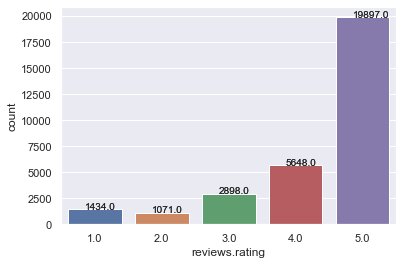

Plotting the distribution of ratings for our dataframe


In [36]:
%matplotlib inline
sns.countplot(x=data['reviews.rating'],palette ='Set2')
plt.ylabel=('count')
#plt.xlabel=('Sentiment')
ax = sns.countplot(x="reviews.rating", data=data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()
print('Plotting the distribution of ratings for our dataframe')

- Majority of ratings are 5 
- Rating 2 marks the minimal count

#### Let's check the distribution basis brand

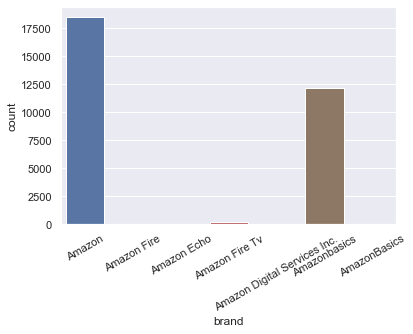

In [37]:
ax=sns.countplot(x=data['brand'])
ax.tick_params(axis='x', rotation=30)

In [38]:
# replacing Amazonbasics with AmazonBasics since both are same
print(data['brand'].unique())
data.brand.replace('Amazonbasics', 'AmazonBasics',inplace=True)


['Amazon' 'Amazon Fire' 'Amazon Echo' 'Amazon Fire Tv'
 'Amazon Digital Services Inc.' 'Amazonbasics' 'AmazonBasics']


#### Let's check the ASIN frequency 
- There are 85 unique asins

85


<AxesSubplot:title={'center':'ASIN Frequency'}>

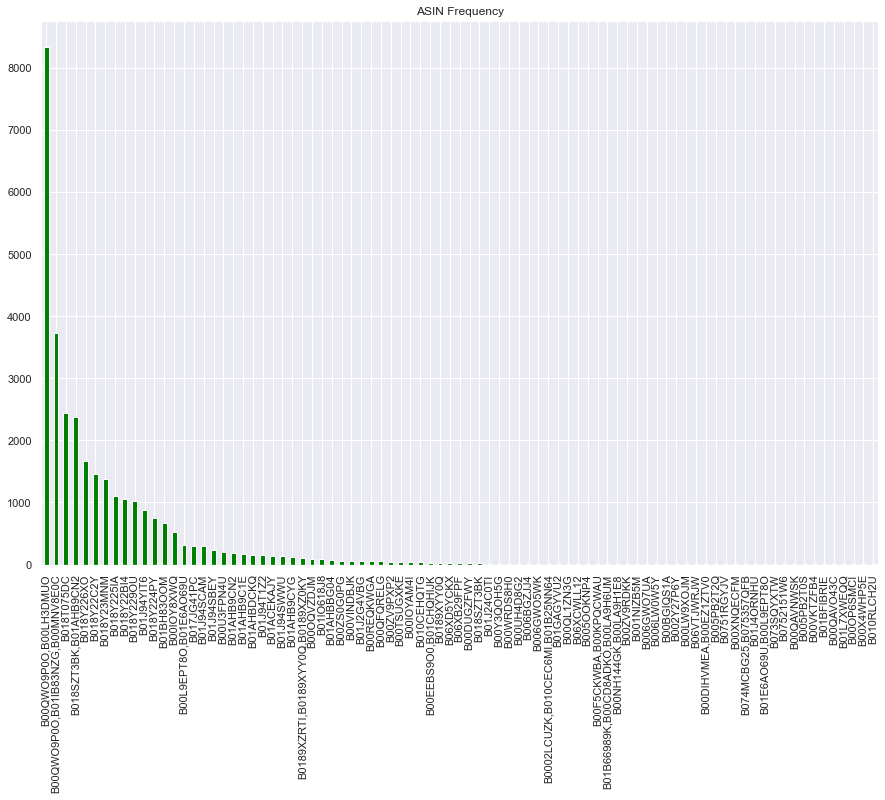

In [39]:
print(data['asins'].nunique())
plt.figure(figsize=(15,10))
asin_count_idx=data['asins'].value_counts().index
data['asins'].value_counts().plot(kind='bar',title='ASIN Frequency',color='green')

#### Insights
- For majority of asins, the frequency count is 1. (negligible in graph but the count is 1)
- The first set of asins, having highest frequency count are variations (parent , child sim) for batteries: duracel
- 2nd Highest set of asins are: again Variations of batteries but the brand is : Amazon 
- Least frequent asins (having frequency 1) are associated with Coffee pod drawers, pet carrier ventilation, etc

#### Let's check the count basis how many out of total observations are recommended 

<AxesSubplot:xlabel='reviews.doRecommend', ylabel='count'>

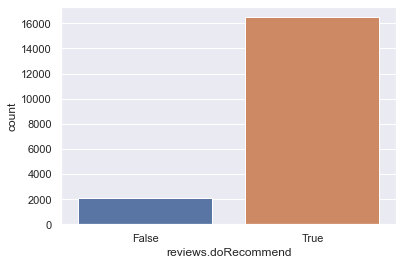

In [40]:
sns.countplot(x='reviews.doRecommend',data=data)

##### Let's create a graph for chdcking for all the ratings how much had the do_recommednation as true

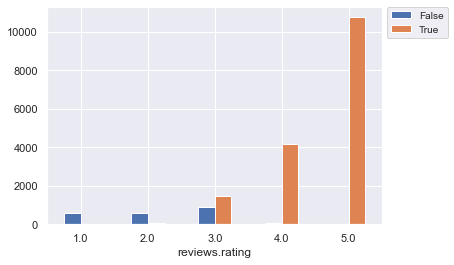

In [41]:
cross_tab=pd.crosstab(data['reviews.rating'],
            data['reviews.doRecommend'])
a=cross_tab.plot(kind='bar',rot=0)
a.legend(bbox_to_anchor=(1,1.02),loc='upper left',fontsize=10)

- From the above graph we can see that out of all the rating, rating 5 and 4 have the do_recommend as True
- There is no such information for ratings 1 or 2

##### Let's see how ratings are distributed basis brands

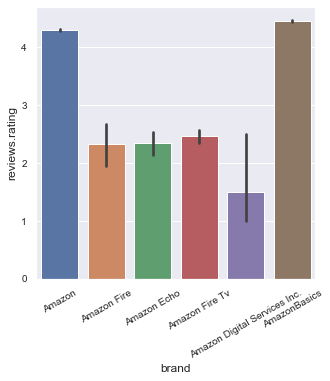

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x=data['brand'],y=data['reviews.rating'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=30)
plt.show()

- Amazon basics has the highest rating among all the other brands.
- Amazon brand has a comparable distribution wrt amazon_basics
- Amazon Digital Services Inc. marks the lowest ratings reviews wrt brand comparison.

##### Let's see brand relating to Sentiment

<Figure size 360x360 with 0 Axes>

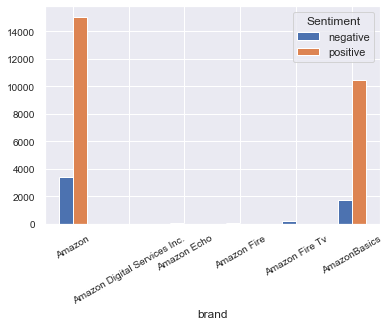

In [43]:
plt.figure(figsize=(5,5))
a=pd.crosstab(data['brand'],data['Sentiment'])
a.plot(kind='bar')
#sns.barplot(x=data['brand'],y=data['Rating'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=30)
plt.show()

- Amazon are having most +ve sentiment followed by Amazon Basics

#### Let's visualize how the sentiment is distributed over the primary categories

<Figure size 1080x1080 with 0 Axes>

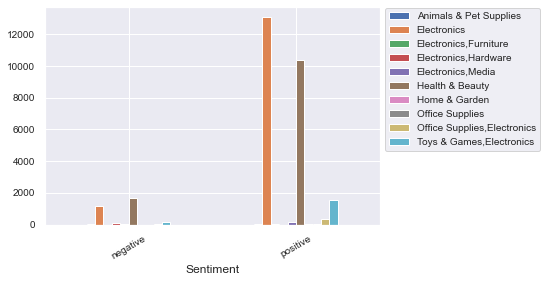

In [44]:
plt.figure(figsize=(15,15))
a=pd.crosstab(data['Sentiment'],data['primaryCategories'],)
ab=a.plot(kind='bar')
ab.legend(bbox_to_anchor=(1,1.02),loc='upper left',fontsize=10)
#sns.barplot(x=data['brand'],y=data['Rating'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=30)
plt.show()

- Electronics, Health & Beauty have highest positive sentiment
- Health & Beauty leads in -ve sentiment as well. but since the data is biased with +ve sentiments, we need to research more on the data

#### Let's visualise the primary categories again but this time wrt differnet ratings

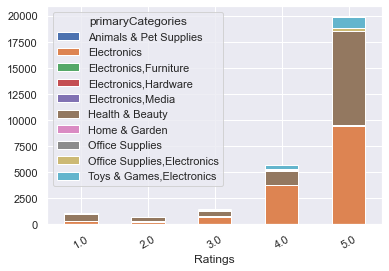

In [45]:
a=pd.crosstab(data['reviews.rating'],data['primaryCategories']).plot(kind='bar',stacked=True,rot=30,)
plt.xlabel('Ratings')
#plt.ylabel('Count of Ratings')
plt.show()

- plotting grouped bar graph for better understanding

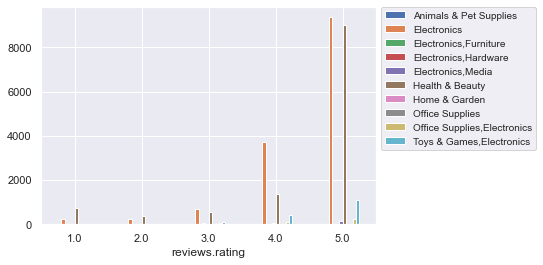

In [46]:
cross_tab=pd.crosstab(data['reviews.rating'],
            data['primaryCategories'])

a=cross_tab.plot(kind='bar',rot=0)
a.legend(bbox_to_anchor=(1,1.02),loc='upper left',fontsize=10)

- products in Health and beauty and Electronics category have highest review ratings.
- Toys and Games along with Electrocis category can also be found in significantly large count as compared to other categories

In [47]:
data['reviews.date']=pd.to_datetime(data['reviews.date'])

In [48]:
print('Data ranges betweeen ', data['reviews.date'].min(),'and',data['reviews.date'].max())

Data ranges betweeen  2009-02-26 00:00:00+00:00 and 2019-03-25 00:00:00+00:00


- We have total 10 years of data.
- But reviewing and analysing data wrt date will not make much sense if we want to check how the ratings increased/decreased over a time of period.
- As we will not be able to decipher that what could be a reason of instant high rating or instant low ratings (probably one lot of orders were defective and post that the sellers did improve the defect but basis -ve reviews no body is buying that item now)
- We need more detailed data to get into time series analysis, hence skipping the same for now

In [49]:
data.describe()['reviews.rating'].T

count    30948.000000
mean         4.341056
std          1.084308
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

In [50]:
ratings_count = pd.DataFrame(data['reviews.rating'].value_counts()).reset_index()
ratings_count.columns = ['rating', 'count']
ratings_count

,rating,count
0,5.0,19897
1,4.0,5648
2,3.0,2898
3,1.0,1434
4,2.0,1071


### Basic Data Exploration in Text Mining

- The major columns for concern in text analysis are: reviews.text, title and rating.
- Let's check if anyone of them have null values that are needed to be treated.

In [51]:
print(data['reviews.text'].isnull().sum(),
data['reviews.title'].isnull().sum(),
data['reviews.rating'].isnull().sum())

0 0 0


In [52]:
data.isna().sum()

id                         0
name                     357
asins                      0
brand                      0
categories                 0
keys                       0
manufacturer               0
reviews.date               0
reviews.dateSeen           0
reviews.doRecommend    12349
reviews.numHelpful     12290
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           0
Sentiment                  0
dateAdded               2311
dateUpdated             2311
primaryCategories       2311
imageURLs               2311
manufacturerNumber      2311
sourceURLs              2311
dtype: int64

In [49]:
#data=pd.read_csv('Dataset/data.csv')

#### creating a new dataframe named: data_sentiment for text based explorations

In [154]:
data_sentiment=data[['reviews.text','reviews.title','reviews.rating','Sentiment']]

- Lets get a word count from the text

In [155]:
data_sentiment['totalwords'] = [len(x.split()) for x in data_sentiment['reviews.text'].tolist()]
data_sentiment[['reviews.text','totalwords','Sentiment']].sample(5)

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3229252714.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews.text,totalwords,Sentiment
1621,I bought this thinking since we'd bought sever...,63,negative
13545,great value and last a long time,7,positive
24759,"I believe this' a great item, my sister has 1 ...",21,positive
6238,What a great deal!!! Haven't had an issue with...,12,positive
21249,I bought this tablet for my three year old nie...,32,positive


- Check the Number of Characters including spaces

In [156]:
data_sentiment['char_count'] = data_sentiment['reviews.text'].str.len() ## this also includes spaces
data_sentiment[['reviews.text','char_count','reviews.rating','Sentiment']].head()

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3098556648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews.text,char_count,reviews.rating,Sentiment
0,Didn't have some of the features I was looking...,100,2.0,negative
1,i Bought this around black friday for $60 hopi...,1080,1.0,negative
2,I bought this tablet for my 4 year old daughte...,123,1.0,negative
3,I was hoping to use Google launcher with this ...,178,3.0,negative
4,The tablet works fine. It is responsive with g...,219,3.0,negative


- Let's check the Average word length

In [157]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
data_sentiment['avg_word'] = data_sentiment['reviews.text'].apply(lambda x: avg_word(x))
data_sentiment[['reviews.text','avg_word','reviews.rating','Sentiment']].head()

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/4292611457.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews.text,avg_word,reviews.rating,Sentiment
0,Didn't have some of the features I was looking...,4.050000,2.0,negative
1,i Bought this around black friday for $60 hopi...,4.123223,1.0,negative
2,I bought this tablet for my 4 year old daughte...,4.166667,1.0,negative
3,I was hoping to use Google launcher with this ...,4.424242,3.0,negative
4,The tablet works fine. It is responsive with g...,4.238095,3.0,negative


- Let's check the number of stopwords in each review

In [158]:
stop = stopwords.words('english')
data_sentiment['stopwords'] = data_sentiment['reviews.text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_sentiment[['reviews.text','stopwords','totalwords','avg_word']].head()

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3321954700.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews.text,stopwords,totalwords,avg_word
0,Didn't have some of the features I was looking...,9,20,4.050000
1,i Bought this around black friday for $60 hopi...,88,211,4.123223
2,I bought this tablet for my 4 year old daughte...,8,24,4.166667
3,I was hoping to use Google launcher with this ...,15,33,4.424242
4,The tablet works fine. It is responsive with g...,15,42,4.238095


In [159]:
data_sentiment.head()

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords
0,Didn't have some of the features I was looking...,Wasn't for me,2.0,negative,20,100,4.050000,9
1,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,1.0,negative,211,1080,4.123223,88
2,I bought this tablet for my 4 year old daughte...,Ended up returning,1.0,negative,24,123,4.166667,8
3,I was hoping to use Google launcher with this ...,A cheap tablet,3.0,negative,33,178,4.424242,15
4,The tablet works fine. It is responsive with g...,Works well but too tied to Amazon.,3.0,negative,42,219,4.238095,15


In [160]:
data_sentiment[data_sentiment['stopwords']>500]

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords
18059,"I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4.0,positive,1539,8351,4.426901,703
18060,"I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4.0,positive,1539,8351,4.426901,703
21036,"I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4.0,positive,1539,8351,4.426901,703
26903,"I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,4.0,positive,1539,8351,4.426901,703


- Let's check the stopwords present in a text review using boxplot

<AxesSubplot:xlabel='Sentiment', ylabel='stopwords'>

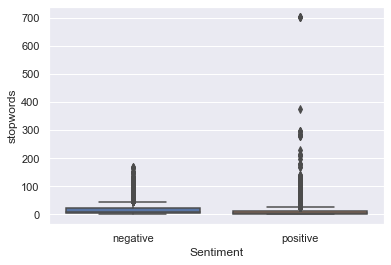

In [161]:
sns.boxplot(x=data_sentiment['Sentiment'], y=data_sentiment['stopwords'])

#### Let's check how are number of words and stopwords related to each other

<AxesSubplot:xlabel='totalwords', ylabel='stopwords'>

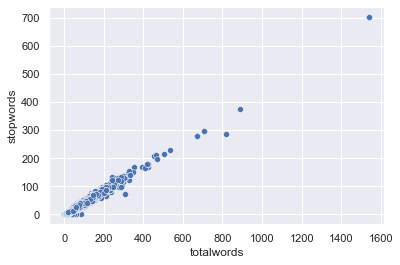

In [162]:
sns.scatterplot(x=data_sentiment['totalwords'], y=data_sentiment['stopwords'])

- the more words in a review,the more stopwords are present.
- No. of stopwords are directly proportional to number of words
- They are linearly related

In [163]:
data_sentiment.head()

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords
0,Didn't have some of the features I was looking...,Wasn't for me,2.0,negative,20,100,4.050000,9
1,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,1.0,negative,211,1080,4.123223,88
2,I bought this tablet for my 4 year old daughte...,Ended up returning,1.0,negative,24,123,4.166667,8
3,I was hoping to use Google launcher with this ...,A cheap tablet,3.0,negative,33,178,4.424242,15
4,The tablet works fine. It is responsive with g...,Works well but too tied to Amazon.,3.0,negative,42,219,4.238095,15


- We can see that for a negative review, people have used more stopwords

In [164]:
data_sentiment.tail()

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords
30952,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,5.0,positive,29,116,3.034483,11
30953,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,4.0,positive,18,83,3.666667,8
30954,"Very nice for light internet browsing, keeping...",You get a lot for the price!,5.0,positive,57,317,4.578947,18
30955,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,5.0,positive,43,241,4.627907,13
30956,"At ninety dollars, the expectionations are low...",You get what your paying for,4.0,positive,60,315,4.266667,27


- For a positve review, seems like people tend to use more relevant words instead of just stopwords

TypeError: 'str' object is not callable

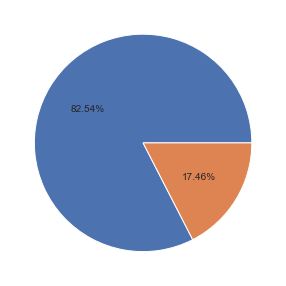

In [165]:
plt.figure(figsize = (5, 5))

labels = ['Positive Sentiment', 'Negative Sentiment']
plt.pie(data_sentiment['Sentiment'].value_counts(), autopct='%0.2f%%')#,colors=colors)

plt.title('Distribution of Sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

- Post selecting only negative values from 2 dataframes and all the observations from 3rd df, we can still identify that data is biased towards the positive sentiment.
- Before creating the model we need to perform data balancing or else the model will be biased

In [ ]:
sns.countplot(x=data_sentiment['Sentiment'])

In [ ]:
data_sentiment[data_sentiment['reviews.text'].duplicated()].sample(5)

In [ ]:
q=(data_sentiment[data_sentiment.duplicated()])
print('Positive Sentiment duplicates count',len(q[q['Sentiment']=='positive']))
print('Negative Sentiment duplicates count',len(q[q['Sentiment']=='negative']))

- These are not exact duplicates, also the count is huge, dropping them might lead us to data loss, hence keeping them as is

### DATA PRE_PROCESSING

- We are only working in pre-processing the text and not reviews title, as title can be phrased and it might not add much sense to data exploration
- function preprocess will clean the text data: converts to lowercase, remove punctuations and remove stopwords

In [166]:
def preprocess(li):
    for i in li:
        ######### convert text to lowercase #########
        data_sentiment[i]=data_sentiment[i].apply(str.lower)
        
        ########## remove punctuations ###########
        r = re.compile(r'[^\w\s]+')
        data_sentiment[i] = [r.sub('', s) for s in data_sentiment[i].tolist()]
        
        ########### remove numbers and special characters if any #######
        data_sentiment[i] = data_sentiment[i].str.replace("[^a-zA-Z#]", " ")
        ## removing stopwords ##
        stop = stopwords.words('english')
        data_sentiment[i+'_without_stopwords'] = data_sentiment[i].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 

In [167]:
preprocess(['reviews.text'])

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3718082592.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3718082592.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3718082592.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3718082592.py:11: SettingWithCopyWarning:


A value is trying to

In [168]:
data_sentiment.head()

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords,reviews.text_without_stopwords
0,didnt have some of the features i was looking ...,Wasn't for me,2.0,negative,20,100,4.050000,9,didnt features looking returned next day may g...
1,i bought this around black friday for hopin...,TERRIBLE DONT BUY,1.0,negative,211,1080,4.123223,88,bought around black friday hoping would awesom...
2,i bought this tablet for my year old daughte...,Ended up returning,1.0,negative,24,123,4.166667,8,bought tablet year old daughter many advertise...
3,i was hoping to use google launcher with this ...,A cheap tablet,3.0,negative,33,178,4.424242,15,hoping use google launcher tablet really locke...
4,the tablet works fine it is responsive with go...,Works well but too tied to Amazon.,3.0,negative,42,219,4.238095,15,tablet works fine responsive good resolution t...


#### Let's check the 20 most frequently occuring words post removal of stopwords and then we will decide whether to keep it or remove those

In [169]:
freq = pd.Series(' '.join(data_sentiment['reviews.text_without_stopwords']).split()).value_counts()[:20]
freq

great        9779
batteries    8058
tablet       7538
good         6438
price        5477
use          4905
amazon       4405
love         3633
bought       3603
kindle       3244
one          3225
easy         3030
like         2912
kids         2792
work         2617
well         2593
fire         2543
long         2526
buy          2523
would        2521
dtype: int64

- Few words like 'amazon','like', 'would' can be removed.
- word like 'well' , it can give some meaningful insight on 'product didnot work well' or 'it worked well', hence leaving it as is

#### Rare Words Removal
- This is done as association of these less occurring words with the existing words could be a noise.
- Let's check least frequent 10 words

In [170]:
freq = pd.Series(' '.join(data_sentiment['reviews.text_without_stopwords']).split()).value_counts()[-10:]
freq

perfectlyafter    1
nearperfect       1
precharged        1
cheper            1
adaquate          1
perf              1
closethallway     1
handsi            1
duracels          1
bookreader        1
dtype: int64

- words like perf could be deciphered as performance, and few words like adaquate: miss-spelled of adequate.
- They seem to be sensible words but mis-typed.
- As of now let's keep it as is and proceed with lemmatization

- Function preprocess will remove do following:
1) Lowercase all data in columns ‘title’ and ‘text’<br>
          Using str.lower on column to make it lowercase<br>
2) Remove all punctuations from columns 'title' and 'text'<br>

- Remove the custom stopwords identified above

In [171]:
########
manual = ['amazon','Amazon','would','bought','kid','kids','batterie'] 
data_sentiment['reviews.text_without_stopwords'] = data_sentiment['reviews.text_without_stopwords'].apply(
    lambda x: " ".join(x for x in x.split() if x not in manual))

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/411407030.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
data_sentiment.head(2)

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords,reviews.text_without_stopwords
0,didnt have some of the features i was looking ...,Wasn't for me,2.0,negative,20,100,4.050000,9,didnt features looking returned next day may g...
1,i bought this around black friday for hopin...,TERRIBLE DONT BUY,1.0,negative,211,1080,4.123223,88,around black friday hoping awesome failed hard...


- Remove accented words
- words havinf espcial accented characters eg. café , etc

In [173]:
def remove_accent(text):
    text = unidecode.unidecode(text)
    return text

In [174]:
temp_list = []
for rows in data_sentiment['reviews.text_without_stopwords']:
    temp_list.append(remove_accent(rows))
data_sentiment['reviews.text_without_stopwords'] = temp_list

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/522096943.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Tokenization

- For converting the text/sentence into tokens, method: word_tokenize has been used from nltk library 

In [175]:
data_sentiment['reviews.clean'] = data_sentiment['reviews.text_without_stopwords'].apply(word_tokenize)

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3171411082.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
data_sentiment.head(2)

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords,reviews.text_without_stopwords,reviews.clean
0,didnt have some of the features i was looking ...,Wasn't for me,2.0,negative,20,100,4.050000,9,didnt features looking returned next day may g...,"[didnt, features, looking, returned, next, day..."
1,i bought this around black friday for hopin...,TERRIBLE DONT BUY,1.0,negative,211,1080,4.123223,88,around black friday hoping awesome failed hard...,"[around, black, friday, hoping, awesome, faile..."


- There can be slangs present in the review text as well for eg. going : gng, because: cuz, amazing : amzng, etc.
- As per my understanding, if we use stemming, there might be a possibility of data loss.
- Hence I am using lemmatization

#### Lemmatization

In [177]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_word(x):
  return [lemmatizer.lemmatize(w,pos='v') for w in x]
  
data_sentiment['reviews.clean'] = data_sentiment['reviews.clean'].map(lemmatize_word)

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrsriv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/4166931674.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrsriv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- As we can see in above sample words like looking got changed to look post lemmatization

### Visualizing the wordcloud

#### Generate wordcloud
- below is the function to create word cloud

In [178]:
#Function to Create Wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
def create_wordcloud(data,title=None):

    wc = WordCloud(background_color='black',
    max_words=500,scale=3
    )
    wc.generate(str(data))
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

- Wordcloud for all the pre-prerocessed text data

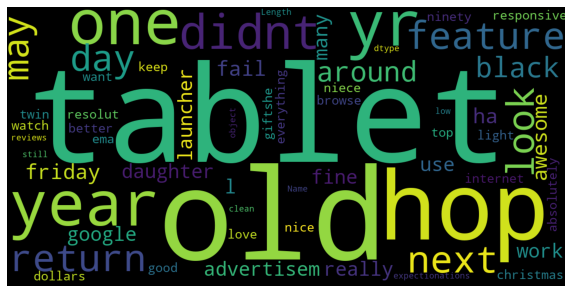

In [179]:
create_wordcloud(data_sentiment['reviews.clean'])

- Wordcloud for only positive Sentiment

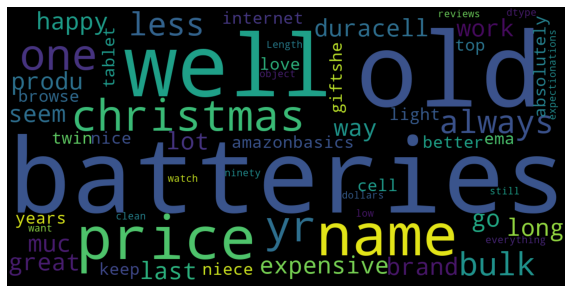

In [180]:
pos=data_sentiment['reviews.clean'][data_sentiment['Sentiment']=='positive']
create_wordcloud(pos)

- From the wordcloud of positive sentiments we can see that batteries have more number of +ve reviews.


- Wordcloud for only positive Sentiment

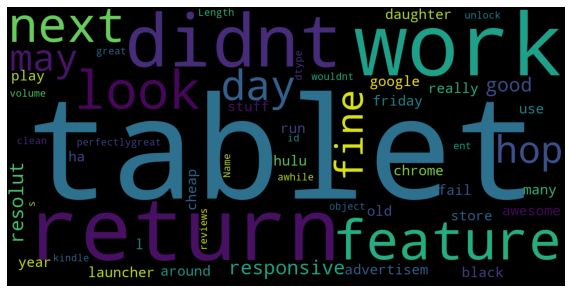

In [181]:
neg=data_sentiment['reviews.clean'][data_sentiment['Sentiment']=='negative']
create_wordcloud(neg)

- From the -ve wordcloud we can see that users are mentioning product as not good, or it stopped working next day. It did not work etc.

- Actions to perform in Milestone 2:
- From a business perscpective, we need to understand what are the top keywords that identify a product having good rating (4/5) 
- We need to perform assign weights to keywords and find the sentiment associated to it

## Milestone 2

In [182]:
data_sentiment.reset_index(inplace=True,drop=True)

In [183]:
data_sentiment['reviews.clean_text']=''
for i in range(0,len(data_sentiment)):
    data_sentiment['reviews.clean_text'][i]=' '.join(data_sentiment['reviews.clean'][i])


C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3226426923.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/3226426923.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
#data_sentiment.to_csv('Dataset/data_sentiment.csv')

In [185]:
#data_sentiment=pd.read_csv('Dataset/data_sentiment.csv')
#data_sentiment.drop('Unnamed: 0',inplace=True,axis=1)

### Below is the dataframe that we are going to use proceeding ahead with model creation

In [186]:
data_sentiment.head(2)

,reviews.text,reviews.title,reviews.rating,Sentiment,totalwords,char_count,avg_word,stopwords,reviews.text_without_stopwords,reviews.clean,reviews.clean_text
0,didnt have some of the features i was looking ...,Wasn't for me,2.0,negative,20,100,4.050000,9,didnt features looking returned next day may g...,"[didnt, feature, look, return, next, day, may,...",didnt feature look return next day may good ot...
1,i bought this around black friday for hopin...,TERRIBLE DONT BUY,1.0,negative,211,1080,4.123223,88,around black friday hoping awesome failed hard...,"[around, black, friday, hop, awesome, fail, ha...",around black friday hop awesome fail hard try ...


##### Importing additional modules required for Model Building

In [337]:

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score,  precision_score, recall_score
import numpy as np
import plotly.io as pio
from wordcloud import WordCloud,STOPWORDS
from collections import defaultdict
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly import tools
pio.renderers.default='notebook'
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import euclidean_distances

###### Encoding the Sentiment label as 0 for Negative and 1 for Positive

In [188]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
data_sentiment['Sentiment']= label_encoder.fit_transform(data_sentiment['Sentiment']) 
data_sentiment['Sentiment'].unique() 

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/1447101226.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1])

In [189]:
data_sentiment['Sentiment'].value_counts()

1    25545
0     5403
Name: Sentiment, dtype: int64

#### Build various model to classify the sentiment. Use Probabilistic approach, Machine Learning Methods and Pre-trained Models.

We will build Probabilistic model:<br>
-  Naive Bayes<br>

Machine learning model:<br>
- Random Forest<br>
- XGBoost <br>

Pre-trained model<br>




Let's declare our X and y variables,<br> X having the reviews text and y having the Sentiment as 0 for Negative and 1 for Positive basis Ratings

In [190]:
X=data_sentiment['reviews.clean_text']
y=data_sentiment['Sentiment']

- Let's create 2 dataframes out of our data_sentiment with a fraction of random samples having train data as 80% and test data as 20%
- We will use the test dataframe in order to find out whether the sentiment from our dataframes are matching to the base Sentiment we decided basis ratings

In [191]:
reviews_train = data_sentiment[['reviews.text', 'reviews.rating','reviews.clean_text','Sentiment']].sample(frac = 0.8, random_state = 10)
reviews_test = data_sentiment[['reviews.text', 'reviews.rating','reviews.clean_text','Sentiment']].drop(reviews_train.index)
print(reviews_train.shape,reviews_test.shape)

(24758, 4) (6190, 4)


- We are using TfIDF vectorizer in order to compute a weight to each word which signifies the importance of the word in the document and corpus.
- max_df and min_df have been used to filter/remove the terms that appear in less than 50 documents and more than 90% of the documents.


In [192]:
vectorizer = TfidfVectorizer(max_df = 0.80,min_df= 50) 
X=vectorizer.fit_transform(data_sentiment['reviews.clean_text']).toarray()

##### Function to split the data into train and test
- Function named: data_split that takes 2 parameters: X and y
- We are using a test_size of 0.2 and random state as 10
- We are spliting the data into train and test set and will be using the same throughout different models

In [193]:
## Splitting the dataset into Train and Test
def data_split(X_resample,y_resample):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
    return X_train, X_test, y_train, y_test

In [194]:
X_train, X_test, y_train, y_test=data_split(X,y)

- Function to plot confusion matrix: plot_confusion_matrix()
- function takes 2 mandatory parameters : confusion matrix and classes of sentiment: Positive and Negative

In [195]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title=title
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.ylabel='True label'
    #plt.xlabel='Predicted label'

    plt.tight_layout()
    plt.ylabel='True label'
    plt.xlabel='Predicted label'

- report (): Function to print result mentioning accuracy, scores
- this function takes 2 parameters, y and y_predicted


In [257]:
model_name=[]
accuracy__score=[]
f1__score=[]
precision__score=[]
recall__score=[]

In [258]:
def report(y_,y__pred):
    matrix=confusion_matrix(y_,y__pred)
    print("\nMatrix")
    print(matrix)
    score=accuracy_score(y_,y__pred)
    print("\nAccuracy Score")
    print(score)
    report=classification_report(y_,y__pred)
    print("\nClassification Report")
    print(report)
    accuracyscore = accuracy_score(y_, y__pred)
    f1score = f1_score(y_, y__pred)
    precisionscore = precision_score(y_, y__pred)
    recallscore = recall_score(y_, y__pred)
    return accuracyscore,f1score, precisionscore,recallscore

Model_build function: 
- This function fits the model on train set and predict outcomes on the test set
- It generates the report containing the accuracy/ precision 
- And also prints the confusion matrix for the testset 

In [259]:
def model_build(m):
    global y_train,y_pred_test,y_pred_train,y_test
    m.fit(X_train,y_train)
    y_pred_test=m.predict(X_test)
    y_pred_train=m.predict(X_train)
    print("***********************Report for Test Data***********************\n")
    report(y_test,y_pred_test)
    #if type(m)!=sklearn.naive_bayes.MultinomialNB:
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    plot_confusion_matrix(cm, classes = ['Positive','Negative'])
    print("***********************Report for Train Data***********************\n")
    accuracyscore,f1score, precisionscore,recallscore=report(y_train,y_pred_train)
    #model_name=model_name.append(str(m))
    accuracy__score.append(accuracyscore)
    f1__score.append(f1score)
    precision__score.append(precisionscore)
    recall__score.append(recallscore)

In [260]:
# to store prediction for future visualization purpose
prediction={}

### Random Forest with TF-IDF VECTOR

***********************Report for Test Data***********************


Matrix
[[ 716  374]
 [  81 5019]]

Accuracy Score
0.9264943457189014

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1090
           1       0.93      0.98      0.96      5100

    accuracy                           0.93      6190
   macro avg       0.91      0.82      0.86      6190
weighted avg       0.92      0.93      0.92      6190

Confusion matrix, without normalization
***********************Report for Train Data***********************


Matrix
[[ 4231    82]
 [   11 20434]]

Accuracy Score
0.9962436384199047

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4313
           1       1.00      1.00      1.00     20445

    accuracy                           1.00     24758
   macro avg       1.00      0.99      0.99     24758
weighted avg       1.00      1.00 

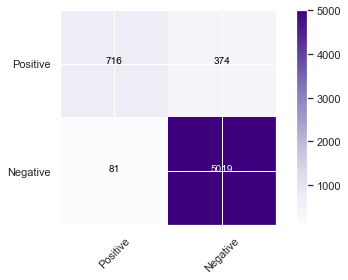

In [261]:
rf=RandomForestClassifier()
model_build(rf)

In [262]:
model_name=[]
prediction['RandomForest'] = rf.predict_proba(X_test)[:,1]
reviews_test['RF_Prediction'] = rf.predict(X_test)

- I used GridSearchCV to check for best set of hyperparameters, Since the dataset is huge, I ran the code snippet in AWS instance and below used parameters are came out as the best fit.
- The code snippet took longer than usual hence, I have skipped running the best_param set here in the notebook here.
- We can calso take up a random sample of 50% of data and proceed with model building, but I have used the whole dataset.

In [263]:
model_name.append('Random Forest')

In [203]:
grid_param={
    'n_estimators':[90,100,115,130],
    'max_depth':range(2,20,1),
    'min_samples_split': range(1,10,1)
}

***********************Report for Test Data***********************


Matrix
[[  31 1059]
 [   0 5100]]

Accuracy Score
0.8289176090468497

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      1090
           1       0.83      1.00      0.91      5100

    accuracy                           0.83      6190
   macro avg       0.91      0.51      0.48      6190
weighted avg       0.86      0.83      0.76      6190

Confusion matrix, without normalization
***********************Report for Train Data***********************


Matrix
[[  207  4106]
 [    0 20445]]

Accuracy Score
0.8341546166895549

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.05      0.09      4313
           1       0.83      1.00      0.91     20445

    accuracy                           0.83     24758
   macro avg       0.92      0.52      0.50     24758
weighted avg       0.86      0.83 

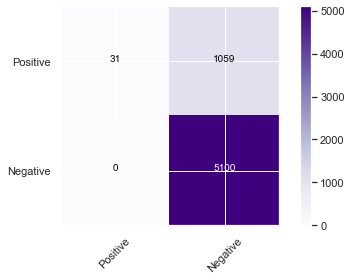

In [268]:
rf1=RandomForestClassifier(max_depth= 14, max_features= 13,min_samples_split=2,n_estimators=100)
model_build(rf1)

- From above we can see that Random forest with default parameter is giving a better accuracy than the one with best params identified from gridSearch CV. Hence we will proceed with RF with default parameters only.

In [269]:
model_name.append('RF_GridCV')

##### Let's check with few text inputs and find out if the prediction of sentiment is coming out correct or not

In [209]:
text = input(str)
rf.predict(vectorizer.transform([text]))

<class 'str'>I didnt like the color


array([0])

- above review is a negative review but we have got a +ve sentiment as prediction

In [210]:
text = input(str)
rf.predict(vectorizer.transform([text]))

<class 'str'>The product seems fairly good but I didnt like the color. Fitting is nice but the fabric seems okok


array([1])

In [212]:
text = input(str)
rf.predict(vectorizer.transform([text]))

<class 'str'>The product seems fairly good but I didnt like the color. Fitting is nice but the fabric seems bad and torn. Returning it. Dissatisfied


array([1])

- Our Random forest model failed to predict the negative sentiment correctly for the last input

### Model - Naive Bayes + TFIDF

For the alpha value of 0.001, the accuracy of the train data is:  0.8776960982308749
For the alpha value of 0.001, the accuracy on the test data is:  0.8686591276252019
******************************************************************************************
For the alpha value of 0.01, the accuracy of the train data is:  0.8776557072461426
For the alpha value of 0.01, the accuracy on the test data is:  0.8686591276252019
******************************************************************************************
For the alpha value of 0.1, the accuracy of the train data is:  0.8776557072461426
For the alpha value of 0.1, the accuracy on the test data is:  0.8686591276252019
******************************************************************************************
For the alpha value of 1, the accuracy of the train data is:  0.8754342030858713
For the alpha value of 1, the accuracy on the test data is:  0.8659127625201939
*****************************************************************

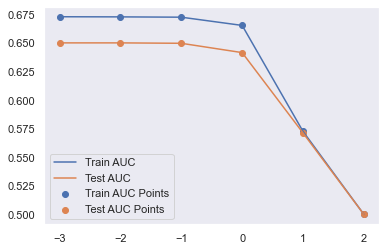

In [270]:
train_auc=[]
test_auc=[]

alpha=[0.001, 0.01, 0.1, 1, 10,100]
for i in alpha:
    
    nb = MultinomialNB(alpha=i)
    nb.fit(X_train, y_train)
    y_pred_train = nb.predict(X_train)
    y_pred_test = nb.predict(X_test)
    print(f"For the alpha value of {i}, the accuracy of the train data is: ",accuracy_score(y_train, y_pred_train))
    print(f"For the alpha value of {i}, the accuracy on the test data is: ",accuracy_score(y_test, y_pred_test))
    print("*"*90)
    
    train_auc.append(roc_auc_score(y_train, y_pred_train))
    test_auc.append(roc_auc_score(y_test, y_pred_test))
    
plt.plot(np.log10(alpha),train_auc,label='Train AUC')
plt.plot(np.log10(alpha),test_auc,label='Test AUC')

plt.scatter(np.log10(alpha),train_auc,label='Train AUC Points')
plt.scatter(np.log10(alpha),test_auc,label='Test AUC Points')

plt.legend()
plt.xlabel="Alpha values"
plt.ylabel="AUC"
plt.title="Error Plot"
plt.grid()
plt.show()

- From above we can see that alpha = 0.001 has the best accuracy.
- Let's train the model

***********************Report for Test Data***********************


Matrix
[[ 341  749]
 [  64 5036]]

Accuracy Score
0.8686591276252019

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.31      0.46      1090
           1       0.87      0.99      0.93      5100

    accuracy                           0.87      6190
   macro avg       0.86      0.65      0.69      6190
weighted avg       0.87      0.87      0.84      6190

Confusion matrix, without normalization
***********************Report for Train Data***********************


Matrix
[[ 1548  2765]
 [  263 20182]]

Accuracy Score
0.8776960982308749

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.36      0.51      4313
           1       0.88      0.99      0.93     20445

    accuracy                           0.88     24758
   macro avg       0.87      0.67      0.72     24758
weighted avg       0.88      0.88 

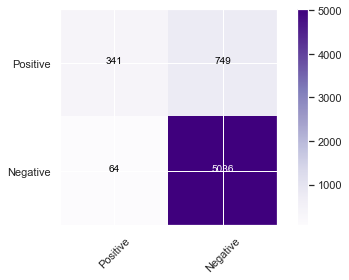

In [271]:
nb_alpha = MultinomialNB(alpha = 0.001)
model_build(nb_alpha)

In [272]:
prediction['Multi_nb'] = nb_alpha.predict_proba(X_test)[:,1]
reviews_test['Multinb_Prediction'] = nb_alpha.predict(X_test)

In [273]:
model_name.append('Multinomial NB')

### XGBOOST

***********************Report for Test Data***********************


Matrix
[[ 607  483]
 [  77 5023]]

Accuracy Score
0.9095315024232633

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.56      0.68      1090
           1       0.91      0.98      0.95      5100

    accuracy                           0.91      6190
   macro avg       0.90      0.77      0.82      6190
weighted avg       0.91      0.91      0.90      6190

Confusion matrix, without normalization
***********************Report for Train Data***********************


Matrix
[[ 2814  1499]
 [  133 20312]]

Accuracy Score
0.9340819129170369

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.65      0.78      4313
           1       0.93      0.99      0.96     20445

    accuracy                           0.93     24758
   macro avg       0.94      0.82      0.87     24758
weighted avg       0.94      0.93 

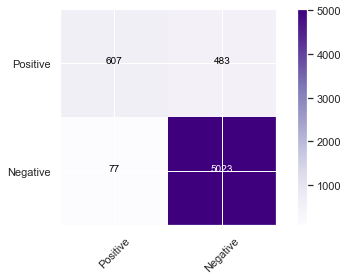

In [274]:
from xgboost import XGBClassifier
XG= XGBClassifier()
model_build(XG)

In [275]:
prediction['XG'] = XG.predict_proba(X_test)[:,1]
reviews_test['XGB_Prediction'] = XG.predict(X_test)
model_name.append('XGB Classifier')

ROC curve


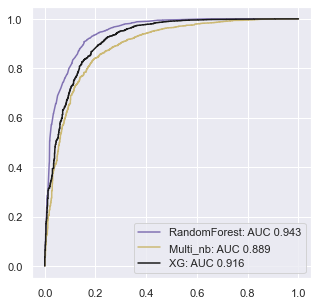

In [276]:
from importlib import reload
plt=reload(plt)
plt.figure(figsize = (5,5))
index = 0
colors = ['m', 'y', 'k', 'g', 'r']
print('ROC curve')
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[index], label='%s: AUC %0.3f'% (model,roc_auc))
    index += 1

plt.title='ROC Classifiers'
plt.legend(loc='lower right')
plt.ylabel='True Positive Rate'
plt.xlabel='False Positive Rate'
plt.show()

In [281]:
reviews_test.sample(4)

,reviews.text,reviews.rating,reviews.clean_text,Sentiment,RF_Prediction,Multinb_Prediction,XGB_Prediction
25133,this tablet is great for browsing the internet...,5.0,tablet great browse internet affordable,1,1,1,1
5949,the best,5.0,best,1,1,1,1
28817,still learning new things about my tablet very...,5.0,still learn new things tablet easy use perfect...,1,1,1,1
10656,love love love amazon batteries every one that...,5.0,love love love batteries every one ive order p...,1,0,1,0


In [282]:
print('RF_Prediction')
display(pd.crosstab(reviews_test['Sentiment'],reviews_test['RF_Prediction']))
print('MultiNB_Prediction')
display(pd.crosstab(reviews_test['Sentiment'],reviews_test['Multinb_Prediction']))
print('XGB_Prediction')
display(pd.crosstab(reviews_test['Sentiment'],reviews_test['XGB_Prediction']))


RF_Prediction


RF_Prediction,0,1
Sentiment,,
0,155,898
1,642,4495


MultiNB_Prediction


Multinb_Prediction,0,1
Sentiment,,
0,69,984
1,336,4801


XGB_Prediction


XGB_Prediction,0,1
Sentiment,,
0,129,924
1,555,4582


- From the above matrices we can see that for negative reviews, our models are having issues predicting the sentiment

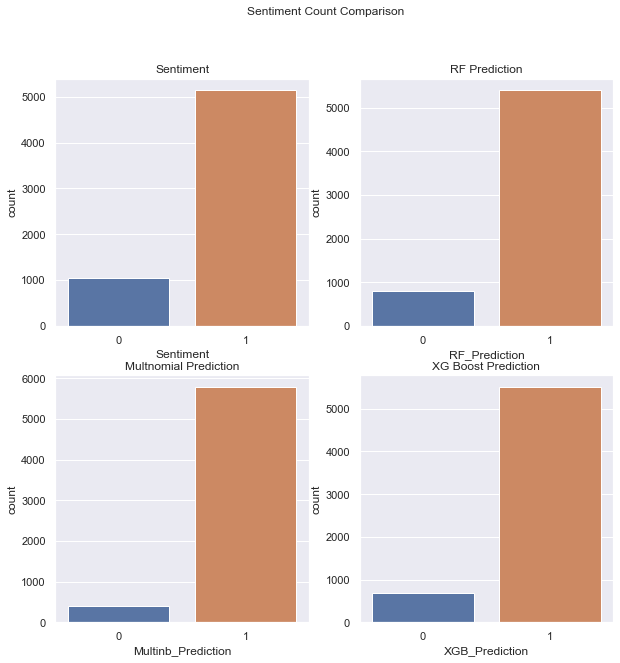

In [283]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(x=reviews_test['Sentiment'], ax=axs[0, 0])
sns.countplot(x=reviews_test['RF_Prediction'], ax=axs[0, 1])
sns.countplot(x=reviews_test['Multinb_Prediction'], ax=axs[1, 0])
sns.countplot(x=reviews_test['XGB_Prediction'], ax=axs[1, 1])

axs[0, 0].set_title('Sentiment')
axs[0, 1].set_title('RF Prediction')
axs[1, 0].set_title('Multnomial Prediction')
axs[1, 1].set_title('XG Boost Prediction')

plt.suptitle("Sentiment Count Comparison")
plt.show()

### Pre-trained model

#### For working with below Pre-trained model, I have considered only reviews where the length of review is less than 512 only.
- Since the set is different from the test data used in above models, hence we can't establish a comparison between performance and accuracy with them.
- Future implementation: run the same on whole dataset and compare the prediction with probablistic and other ML model

#### model: distilbert-base-uncased-finetuned-sst-2-english

In [232]:
import transformers
import random
from transformers import pipeline 
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analyzer = pipeline('sentiment-analysis',model_name)

In [234]:
df_temp = data_sentiment.copy()
df_temp['filtered_reviews']= df_temp['reviews.clean_text'][df_temp['reviews.clean_text'].str.len()< 512]
df_temp.dropna(inplace =True)
def Pretrained_model():
    n=len(df_temp)
    """ Return Dataframe of reviews sentimental prediction and actual sentimental"""
    res_list = []
    global sentiment_act, sentiment_pred
    for _ in range(n):
        temp_dict = {}
        i = random.choice(range(len(df_temp)))
        text_ = df_temp['reviews.clean_text'].iloc[i]
        sentiment_act = df_temp['Sentiment'].iloc[i]
        rating = df_temp['reviews.rating'].iloc[i]
        sentiment_pred = sentiment_analyzer(text_)[0]['label']
        temp_dict['reviews.text'] = text_
        temp_dict['reviews.rating'] = rating
        temp_dict['sentiment_act'] = sentiment_act
        temp_dict['sentiment_pred'] = sentiment_pred
        res_list.append(temp_dict)
        
    return pd.DataFrame(res_list)
df_res = Pretrained_model()

In [162]:
#sentiment_analyzer.accuracy_score()

In [235]:
for i in range(len(df_res)):
    if df_res['sentiment_pred'][i]=='NEGATIVE':
        df_res.loc[i,'sentiment_pred']=0
    elif df_res['sentiment_pred'][i]=='POSITIVE':
        df_res.loc[i,'sentiment_pred']=1
    df_res.loc[i,'match'] = df_res['sentiment_act'][i] == df_res['sentiment_pred'][i]

In [236]:
df_res.sample(3)

,reviews.text,reviews.rating,sentiment_act,sentiment_pred,match
2898,like heavy card board box come strength aaa aa...,5.0,1,0,False
8153,batteries work cheap boom sell buy never look ...,5.0,1,1,True
7789,work great battery life better expect,5.0,1,1,True


In [292]:
temp=pd.crosstab(df_res['sentiment_act'],df_res['sentiment_pred'])
temp

sentiment_pred,0,1
sentiment_act,,
0,3954,1361
1,7619,17746



    True Positives (TP): The model predicted positive and the actual label is positive
    True Negative (TN): The model predicted negative and the actual label is negative
    False Positive (FP): The model predicted positive and the actual label was negative
    False Negative (FN): The model predicted  negative and the actual label was positive

- Accuracy: TP +TN/ (TP+TN+FP+FN)
- Precision: TP/(TP+FP)
- Recall: TP/(TP+FN)
- F1score: 2* (P*R)/(P+R)

In [293]:
Accuracy_pretrained=(temp[0][0]+temp[1][1])/(temp[0][0]+temp[0][1]+temp[1][0]+temp[1][1])
print('Accuracy: ',Accuracy_pretrained)
Precision_pretrained=temp[1][1]/(temp[1][1]+temp[1][0])
print('Precision: ',Precision_pretrained)
Recall_pretrained=temp[1][1]/(temp[1][1]+temp[0][0])
print('Recall: ',Recall_pretrained)
F1score_pretrained=2* ((Precision_pretrained*Recall_pretrained)/(Precision_pretrained+Recall_pretrained))
print('F1score: ',F1score_pretrained)

Accuracy:  0.7073011734028684
Precision:  0.9287695608939133
Recall:  0.8177880184331797
F1score:  0.8697527385007473


In [294]:
model_name.append('Pretrained')
accuracy__score.append(Accuracy_pretrained)
f1__score.append(F1score_pretrained)
precision__score.append(Precision_pretrained)
recall__score.append(Recall_pretrained)

#### Let's check the % similarity between the actual sentiments with the predicted ones

In [295]:
print('Count of actual Sentiments with 0 being Negative and 1 being Positive:\n',df_res['sentiment_act'].value_counts())
print('\nCount of predicted Sentiments with 0 being Negative and 1 being Positive:\n',df_res['sentiment_pred'].value_counts())
print('\n% of Actual +ve Sentiments : ',round(df_res['sentiment_act'].value_counts()[1]/len(df_res)*100))
print('% of Predicted +ve Sentiments : ',round(df_res['sentiment_pred'].value_counts()[1]/len(df_res)*100))
print('\n% of Actual -ve Sentiments : ',round(df_res['sentiment_act'].value_counts()[0]/len(df_res)*100))
print('% of Predicted -ve Sentiments : ',round(df_res['sentiment_pred'].value_counts()[0]/len(df_res)*100))


Count of actual Sentiments with 0 being Negative and 1 being Positive:
 1    25365
0     5315
Name: sentiment_act, dtype: int64

Count of predicted Sentiments with 0 being Negative and 1 being Positive:
 1    19107
0    11573
Name: sentiment_pred, dtype: int64

% of Actual +ve Sentiments :  83
% of Predicted +ve Sentiments :  62

% of Actual -ve Sentiments :  17
% of Predicted -ve Sentiments :  38


In [296]:
myDF = pd.DataFrame({
    'Model': model_name,
    'Accuracy': accuracy__score, 
    'F1': f1__score, 
    'Precision': precision__score, 
    'Recall': recall__score
})

myDF = myDF.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
myDF

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.996244,0.997730,0.996003,0.999462
1,XGB Classifier,0.934082,0.961378,0.931273,0.993495
2,Multinomial NB,0.877696,0.930218,0.879505,0.987136
3,RF_GridCV,0.834155,0.908747,0.832756,1.000000
4,Pretrained,0.707301,0.869753,0.928770,0.817788


- By looking at above data we can see that Random Forest working as the the best model providing with high frequency and precision.
- But since the model has been only tested for 20% of data, there could be a possibility that model performance might decrease.
- On the contrary, the pre-trained model has been tested over whole dataset of 30k rows, and has given a fairly good accuracy and F1 score.
- For proceeding further let's consider RF model and pre-trained model as our model and test few new unseen reviews

Below is a review taken from Amazon DP page. Let's see what sentiment our RF model provides.

In [299]:
sample_text=str(input())

 ordered the iPhone 12 and not a scratch on it. I checked out all the lenses, flash, speakers and everything else, but I forgot to make a phone call because I had to go to att and get a new sim since I was transferring from a 6s +. The headphone speaker was messed up as I found out like 9 days later when I could only talk on speaker during calls. Battery health was at 82% but it EASILY lasts a full day plus, even with heavy use.  I ordered a new one before I sent the first one back and there were a few scratches on the top right, but my case covers it up now. Phone had no issues besides a little dust/dirt in the speaker and mic holes, but you can use a wooden toothpicks to gently clean those out. Got everything switched over and sent the other phone back. Battery health on this one was 88%.  Overall, purchase was great - just make sure to double-check everything before the 90 days is up so you can replace it if needed. It feels better in my hand with a case and I added a glass screen p

In [302]:
rf.predict(vectorizer.transform([sample_text]))

array([1])

- the prediction is correct, this review is a positive review

In [305]:
##### Let's check for another review from AMAZOM product Page


In [303]:
sample_text=str(input())

TL;DR: Avoid. Grind feature is a pain. It adds too many more steps to making coffee, too many ways for it to go wrong, a pain to clean. Overall a headache at best.  We love Cuisinart appliances--we have their stand mixer, toaster, ice cream maker and food processor--so I thought this coffee pot would be a new addition. It has been the most frustrating appliance we've ever had, and beyond the worst coffee pot. We thought this would make coffee routine easier. It has instead added too many extra steps and a host of new frustrations.  Coffee setup is clunky. Sure you have to clean the filter and add water. You also have to fill the grinder with a precise amount of beans each time--too many and the coffee backs up into the grinder and makes weak coffee and a mess in the machine. Moisture builds up in the grinder so you have to clean the grinder out and dry it before between each use, which wouldn't be hard if the grounds were dry but when they're wet it cakes into the tiny corners. If you 

In [304]:
rf.predict(vectorizer.transform([sample_text]))

array([0])

- Our RF model predicted the sentiment correct, It is a negative Review


## N-gram analysis


In [307]:
from textblob import TextBlob
data_sentiment['polarity'] = data_sentiment['reviews.text_without_stopwords'].map(lambda text: TextBlob(text).sentiment.polarity)
data_sentiment['review_len'] = data_sentiment['reviews.text_without_stopwords'].astype(str).apply(len)

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/2655991566.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shrsriv\AppData\Local\Temp/ipykernel_21804/2655991566.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#!pip install cufflinks

In [308]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [309]:
data_sentiment['polarity'].iplot(
    kind = 'hist',
    bins = 50,
    xTitle = 'Polarity',
    linecolor = 'black',
    yTitle = 'Count',
    title = 'Sentiment Polarity Distribution')

- Polarity of the data can be seen more towards the +ve side


#### Monogram analysis

Here we will plot most frequent one word in reviews based on sentiments


In [310]:
review_pos = data_sentiment[data_sentiment["Sentiment"]==1].dropna()
review_neg = data_sentiment[data_sentiment["Sentiment"]==0].dropna()

In [311]:
## Function to generate n-grams ##
def generate_ngrams(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## Function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    bars = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return bars

In [312]:
from plotly import subplots
def graph(n_gram):
## Get the bar chart from positive reviews ##
    freq_dict = defaultdict(int)
    for i in review_pos["reviews.text_without_stopwords"]:
        for word in generate_ngrams(i,n_gram):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

    ## Get the bar chart from negative reviews ##
    freq_dict = defaultdict(int)
    for i in review_neg["reviews.text_without_stopwords"]:
        for word in generate_ngrams(i,n_gram):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace2 = horizontal_bar_chart(fd_sorted.head(10), 'brown')

    # Creating two subplots
    fig = subplots.make_subplots(rows=2, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of positive reviews",
                                              "Frequent words of negative reviews"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace2, 2, 1)
    fig['layout'].update(height=950, width=700, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    iplot(fig, filename='word-plots')



In [313]:
graph(n_gram=1)


#### Bigram analysis

Here we will plot most frequent phrase(two words) in reviews based on sentiments


In [314]:
graph(n_gram=2)

- From positive bigrams we can get insights that users liked the product as it was easy to use, got it at good price, giving good performance.
- Negative bigrams: customers have complained regarding durability/ longetivity of producs


#### Trigram analysis

Here we will plot most frequent three words in reviews based on sentiments


In [315]:
graph(n_gram=3)

- Positive trigrams: majorly signifies that Batteries performance is good, 
- Negative Trigrams: Majority of the reviews indicates that the product did not work for a longer time, or the batteris did not perform well, the seller can look for the defects in the product and can improve/increase the sales

## LDA

LDA can be used to perform topic modelling and identify which tags can be grouped and put in under the same cluster.<br>
The model also says in what percentage each document talks about each topic.<br>
We will be using gensim

In [317]:
### importing necessary libraries to perfrom topic modelling
import pyLDAvis
import pyLDAvis.gensim_models as gen
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
pyLDAvis.enable_notebook()


In [318]:
## create a copy of our sentiment dataframe including only the text preprocessed data in form of tokens
data_processed = data_sentiment["reviews.clean"].copy()
data_processed.head(2)

0    [didnt, feature, look, return, next, day, may,...
1    [around, black, friday, hop, awesome, fail, ha...
Name: reviews.clean, dtype: object

In [319]:
# creating dictionary of words with their unique Ids
id2word = gensim.corpora.Dictionary(data_processed)
id2word.filter_extremes(no_below=15, no_above=0.4, keep_n=80000)


In [320]:
print(id2word)

Dictionary<1829 unique tokens: ['day', 'didnt', 'feature', 'good', 'look']...>


In [321]:
print(id2word.token2id)

{'day': 0, 'didnt': 1, 'feature': 2, 'good': 3, 'look': 4, 'may': 5, 'next': 6, 'others': 7, 'return': 8, 'afford': 9, 'also': 10, 'app': 11, 'apps': 12, 'around': 13, 'awesome': 14, 'better': 15, 'black': 16, 'bottom': 17, 'cant': 18, 'card': 19, 'come': 20, 'common': 21, 'could': 22, 'different': 23, 'even': 24, 'every': 25, 'extra': 26, 'fail': 27, 'find': 28, 'format': 29, 'friday': 30, 'galaxy': 31, 'gb': 32, 'get': 33, 'google': 34, 'half': 35, 'hard': 36, 'hop': 37, 'isnt': 38, 'line': 39, 'link': 40, 'main': 41, 'make': 42, 'many': 43, 'matter': 44, 'micro': 45, 'miss': 46, 'multiple': 47, 'non': 48, 'none': 49, 'normal': 50, 'pay': 51, 'play': 52, 'ram': 53, 'reason': 54, 'recognize': 55, 'samsung': 56, 'say': 57, 'sd': 58, 'store': 59, 'tab': 60, 'tablet': 61, 'think': 62, 'time': 63, 'try': 64, 'update': 65, 'use': 66, 'version': 67, 'want': 68, 'wasnt': 69, 'werent': 70, 'work': 71, 'worse': 72, 'yes': 73, 'ad': 74, 'advertisements': 75, 'daughter': 76, 'old': 77, 'rather':

In [322]:
# creating a document term matrix with unique ids and their respective frequencies
corpus = [id2word.doc2bow(text) for text in data_processed]

In [323]:
print(corpus[4])

[(3, 2), (12, 1), (33, 1), (43, 1), (61, 1), (71, 2), (84, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1)]


In [324]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=5,
                                           chunksize=400,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [325]:
lda_model.print_topics()

[(0,
  '0.077*"kindle" + 0.041*"fire" + 0.039*"one" + 0.020*"screen" + 0.020*"read" + 0.017*"new" + 0.015*"love" + 0.015*"much" + 0.013*"like" + 0.013*"better"'),
 (1,
  '0.126*"batteries" + 0.047*"work" + 0.041*"brand" + 0.040*"good" + 0.034*"price" + 0.026*"well" + 0.023*"name" + 0.020*"buy" + 0.017*"far" + 0.016*"seem"'),
 (2,
  '0.110*"last" + 0.098*"long" + 0.028*"time" + 0.028*"cant" + 0.026*"battery" + 0.023*"beat" + 0.022*"dont" + 0.022*"price" + 0.021*"batteries" + 0.020*"money"'),
 (3,
  '0.030*"music" + 0.023*"alexa" + 0.020*"sound" + 0.017*"need" + 0.016*"echo" + 0.016*"card" + 0.015*"listen" + 0.014*"tap" + 0.014*"speaker" + 0.014*"want"'),
 (4,
  '0.195*"great" + 0.067*"price" + 0.061*"good" + 0.060*"tablet" + 0.041*"product" + 0.033*"work" + 0.016*"purchase" + 0.016*"value" + 0.016*"quality" + 0.015*"nice"'),
 (5,
  '0.051*"tablet" + 0.022*"apps" + 0.020*"use" + 0.015*"screen" + 0.014*"read" + 0.014*"book" + 0.013*"like" + 0.013*"good" + 0.013*"ipad" + 0.012*"get"'),
 (6

In [326]:
# feed the LDA model into the pyLDAvis instance"
lda_viz = gen.prepare(lda_model, corpus, id2word)

C:\Users\shrsriv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [327]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.077222  0.083293       1        1  18.081926
1      0.221210 -0.081021       2        1  12.352502
9     -0.169507  0.255676       3        1  12.080450
0     -0.132927 -0.036109       4        1  11.828291
4      0.198724  0.226454       5        1  11.635231
6     -0.100968 -0.100450       6        1   9.594886
7     -0.088602 -0.190372       7        1   7.501484
2      0.208504 -0.150225       8        1   6.165128
8      0.089513  0.088681       9        1   5.586761
3     -0.148727 -0.095926      10        1   5.173342, topic_info=           Term         Freq        Total Category  logprob  loglift
183       great  9853.000000  9853.000000  Default  30.0000  30.0000
1583  batteries  6509.000000  6509.000000  Default  29.0000  29.0000
121        love  6717.000000  6717.000000  Default  28.0000  28.0000
61       tablet  8482.000000  8482.000000  Default  27.0000  27.0000
398        last  2748.000000  2748.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
42         make   162.374690  1477.240601  Topic10  -4.8103   0.7536
71         work   199.279256  4990.015605  Topic10  -4.6055  -0.2588
66          use   201.350662  7835.320848  Topic10  -4.5951  -0.6997
118        like   179.393148  3260.456297  Topic10  -4.7106   0.0616
52         play   166.676603  2061.420526  Topic10  -4.7841   0.4466

[690 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1679      2  0.997714          aa
1680      2  0.996545         aaa
1692      2  0.978707         aas
664       3  0.880840  absolutely
664       4  0.016620  absolutely
...     ...       ...         ...
1485      6  0.986982    youngest
277       1  0.989334     youtube
277       3  0.004623     youtube
614       3  0.996824          yr
1078      8  0.978111         yrs

[1492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 10, 1, 5, 7, 8, 3, 9, 4])

- From the above plot we can see that there is not much overlapping between the clusters, hence we can say that clusters created out of tags seems fair.
- The topic names that could be considered are listed as follows:<br>
Topic 1: Product categories <br>
Topic 2: Battery Customer<br>
Topic 3: Ideal for gifting<br>
Topic 4: Usage based<br>
Topic 5: Happy Customers Review<br>
Topic 6 Negative review for performance <br>
Topic 7: Performance of product<br>
Topic 8: Performance issue<br>
Topic 9: Physical appearance/body of product <br>
Topic 10: Ease of use

## Recommendation System

#### Let's build a popularity based recommendation system
- Underlying idea is, to recommend the most popular products to users 

In [328]:
def popularity_recom():
    train_group=data.groupby('name').agg({'id':'count','reviews.rating':'mean'}).reset_index()
    train_group.rename(columns={'id':'Score','name':'Product name','reviews.rating':'Mean ratings'},inplace=True)
    train_data=train_group.sort_values(['Score','Product name'],ascending=[False,True])
    recommendation=train_data.head(5)
    return recommendation

In [329]:
review = reviews_train
pd.set_option('display.max_colwidth',50)
pd.set_option('display.max_colwidth',50)
print(popularity_recom())

                                         Product name  Score  Mean ratings
49  AmazonBasics AAA Performance Alkaline Batterie...   8343      4.448040
48  AmazonBasics AA Performance Alkaline Batteries...   3728      4.453594
70  Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...   2443      4.597217
5   All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   2370      4.584388
75  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...   1676      4.531026


###### Irrespective of user preference or the input provided, popularity based recommendation model will give the top 5 products basis the average rating and score of products
- This could be a good model with cold start.


##### Further I have also tried to build recommendation modek based on cosine similarity between the reviews
- The model will determine if any of the review in the corpus are similar to an external review and then print the comparison values for the same

In [336]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import euclidean_distances

In [356]:
vectorizer = TfidfVectorizer(stop_words='english',
                     binary=False,
                     max_df=0.75, 
                     min_df=0.01,
                     ngram_range = (1,3),use_idf = False, norm = None)
doc_vectors = vectorizer.fit_transform(review['reviews.text'])
print(doc_vectors.shape)
print(vectorizer.get_feature_names_out())

(24758, 234)
['aa' 'able' 'access' 'alexa' 'amazing' 'amazon' 'android' 'app' 'apps'
 'available' 'awesome' 'bad' 'basic' 'batteries' 'batteries great'
 'batteries work' 'battery' 'battery life' 'beat' 'best' 'best buy'
 'better' 'big' 'bit' 'black' 'book' 'books' 'bought' 'box' 'brand'
 'brand batteries' 'brands' 'buy' 'buying' 'came' 'camera' 'card' 'case'
 'charge' 'cheap' 'cheaper' 'child' 'children' 'christmas' 'come' 'comes'
 'control' 'controls' 'cost' 'daughter' 'day' 'days' 'deal' 'decent'
 'definitely' 'device' 'devices' 'did' 'didnt' 'different' 'does' 'doesnt'
 'dont' 'download' 'durable' 'duracell' 'easy' 'easy use' 'echo'
 'energizer' 'enjoy' 'excellent' 'expected' 'expensive' 'far' 'fast'
 'features' 'fine' 'free' 'friendly' 'games' 'getting' 'gift' 'going'
 'good' 'good batteries' 'good price' 'good tablet' 'google' 'got'
 'granddaughter' 'grandson' 'great' 'great batteries' 'great deal'
 'great price' 'great product' 'great tablet' 'great value' 'happy' 'hard'
 'havent

In [357]:
def comp_reviews(query, results_number=20):
        results=[]
        q_vector = vectorizer.transform([query])
        print("Comparable review: ", query)
        results.append(cosine_similarity(q_vector, doc_vectors.toarray()))
        f=0
        elem_list=[]
        for i in results[:10]:
            for items in i[0]:
                    
                    elem_list.append(items)
                    f+=1
            
            print("\nThe Review Most similar to the given review and the recommended product is as follows: #" ,elem_list.index(max(elem_list)))
            display("Similarity: ", max(elem_list))
            if sum(elem_list) / len(elem_list)==0.0:
                print("No similar reviews")
            else:
                #t=review.loc[elem_list.index(max(elem_list)):elem_list.index(max(elem_list))]

                display(review.loc[elem_list.index(max(elem_list)):elem_list.index(max(elem_list))])

In [358]:
comp_reviews("This was my first novel by Lucy Foley and it won't be my last. It's August and it's stiflingly hot right now. I find myself longing for a return to cooler weather and so this book, set on the stormy and chilly Irish coast, hit the spot. Foley sets the scenes beautifully and the island where the novel takes place is very nearly a character. There are twists and surprises around every turn and I didn't see the ending coming at all. The characters are miserably unlikeable for the most part and there's a glimmer of redemption for some of them by the time everything wraps up. Just a glimmer mind you. All in all it was an enjoyable read, it's well-executed and I hard a hard time putting it down every night. I recommend this novel highly.")

Comparable review:  This was my first novel by Lucy Foley and it won't be my last. It's August and it's stiflingly hot right now. I find myself longing for a return to cooler weather and so this book, set on the stormy and chilly Irish coast, hit the spot. Foley sets the scenes beautifully and the island where the novel takes place is very nearly a character. There are twists and surprises around every turn and I didn't see the ending coming at all. The characters are miserably unlikeable for the most part and there's a glimmer of redemption for some of them by the time everything wraps up. Just a glimmer mind you. All in all it was an enjoyable read, it's well-executed and I hard a hard time putting it down every night. I recommend this novel highly.

The Review Most similar to the given review and the recommended product is as follows: # 3439


'Similarity: '

0.5962847939999439

,reviews.text,reviews.rating,reviews.clean_text,Sentiment
3439,they dont last as long but theyre cheap,4.0,dont last long theyre cheap,1


In [359]:
comp_reviews("this is not good. I hate the product")

Comparable review:  this is not good. I hate the product

The Review Most similar to the given review and the recommended product is as follows: # 4206


'Similarity: '

0.9999999999999998

,reviews.text,reviews.rating,reviews.clean_text,Sentiment
4206,excelent,5.0,excelent,1


- 

## Insights

1) From the above all models we developed, Random Forest seems to work better, however since the data is biased with ~80% of positive reviews and 20% of negative reviews, there might be a possibility that our model might nor give correct results with realtime data especially if the sentiment is negative.
- Future implications we can validate the model over unseen data, can Fine Tune the model basis the performance using GridSearchCV or randomizedCV.
<br>

2) Due to limited RAM and inaccessibility to CLoud env, I have only performed predictions over Pre-trained model.
- We can try fitting the pipeline with our data and can judge the model performance
<br>

3) While working with the recommendation system, I have also tried to find out what type of output we get if we are only matching an unseen review from the corpus that we have.
- the model seems to extract and provide some matching observations from our corpus, but identifying only basis reviews can not be a good approach.
- For eg. If a person is writing he/she likes the fit well . I love the item.
- He could be talking about a mouse that for him/her size of mouse is not correct or a cloth.
- It would not be relevant to suggest person looking for gaming mouse with a 'coffee maker' as it also has 'I love the item'.
<br> 

My future Insights, we can work upon user-item based recommendation system. I will work upon a model and maybe in future can send my model to GL team to get a feedback as this is an interesting task.


### Business Insights

1) From the N-grams analysis, I have identified that majority of the negative feedbacks are in and around the performance of product that I has performed form some time but post that, product stopped working.<br>

2) There has been subsequent amount of negative reviews basis battery, that either it did not work or stopped working after few days.
- To increase the sales and reduce the negative feedback, sellers can check what is the issue with batteries, Is the battery leaked or it's already dischaged.
- Post observing the defect, they can start with a new lot .<br> 

3) There can be cases, where people write random and vague reviews due to which our analysis might go wrong.
- For eg. product is nice but my coupon code did not work , didn't get discount hence 1 Star.
- OR
- I loved my phone, but they look over a week to deliver the product, nice broduct but bad delivery hence 1 Star<br>

4) To cope up with these type of vague errors, as a enhancement or stepup, we can include neutral sentiment as well
- 1-2 as Negative
- 3 as Neutral
- 4-5 as Positive.
and then do a rigourous text pre-processing 

